In [1]:
import h5py
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt

from reproducibility.utils import data_sample, data_preprocess, set_seed, read_data
from scace import run_scace

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300 # set global dpi

2023-12-07 14:04:38.228008: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Data Preprocessing

In [2]:
####################################  Read dataset  ####################################

data_mat = h5py.File('/Users/jiayi_liu/Desktop/scAce-notes/reproducibility/data/Human_k.h5')
x, y = np.array(data_mat['X']), np.array(data_mat['Y'])
data_mat.close()

####################################  Run without sampling  ####################################

seed = 2023
set_seed(seed)

adata = sc.AnnData(x)
adata.obs['celltype'] = y

adata = data_preprocess(adata)

In [3]:
adata

AnnData object with n_obs × n_vars = 5685 × 22169
    obs: 'celltype', 'n_genes', 'n_counts', 'scale_factor'
    var: 'n_cells', 'mean', 'std'
    uns: 'log1p'

## Run scAce

In default mode, function `run_scace` would return an AnnData object with embedding and clustering result stored in `adata.obsm['scace_emb']` and `adata.obs['scace_cluster']`

In [ ]:
# adata = run_scace(adata)

If return_all is True, function `run_scace` would print and return all temporate results:

- K: Final number of clusters.
- pred_all: All temporary clustering results.
- emb_all: All temporary embedding.


In [ ]:
# adata, K, pred_all, emb_all, run_time = run_scace(adata, return_all=True)

If the key of grount truth cell type (i.e. `cl_type`) is also provided, ARI and NMI will also be returned.

In [4]:
####################################  Run without sampling  ####################################
adata, nmi, ari, K, pred_all, emb_all, run_time = run_scace(
    adata,
    cl_type='celltype',
    return_all=True,
    pretrained_ckpt='/Users/jiayi_liu/Desktop/scAce-notes/pretraining/scace_hk_2.pth'
)

Pre-trained model provided, load checkpoint from file "/Users/jiayi_liu/Desktop/scAce-notes/pretraining/scace_hk_2.pth".
Perform initial clustering through leiden with resolution = 2
Finish initial clustering! Number of initial clusters is 47
Initial Clustering: NMI= 0.6579, ARI= 0.2780
Start training! Total epochs is 500.


Training::   0%|                                     | 0/500 [00:00<?, ?epoch/s]

Train epoch [1/500]. ZINB loss:0.2349, kld loss:13.1332, cluster loss:0.7084, total loss:1.0746


Training::   0%|                          | 1/500 [01:36<13:22:15, 96.46s/epoch]

Clustering   1: NMI= 0.6557, ARI= 0.3144, Delta=0.0989
Train epoch [2/500]. ZINB loss:0.2339, kld loss:22.3551, cluster loss:0.4978, total loss:0.9552


Training::   0%|                          | 2/500 [02:49<11:25:48, 82.63s/epoch]

Clustering   2: NMI= 0.6562, ARI= 0.3241, Delta=0.1182
Train epoch [3/500]. ZINB loss:0.2338, kld loss:26.0223, cluster loss:0.5532, total loss:1.0472


Training::   1%|▏                         | 3/500 [03:59<10:35:54, 76.77s/epoch]

Clustering   3: NMI= 0.6574, ARI= 0.3373, Delta=0.0545
Train epoch [4/500]. ZINB loss:0.2349, kld loss:29.8273, cluster loss:0.5699, total loss:1.1030


Training::   1%|▏                         | 4/500 [05:15<10:34:37, 76.77s/epoch]

Clustering   4: NMI= 0.6571, ARI= 0.3365, Delta=0.0507
Reach tolerance threshold. Perform cluster merging.
-----------------iter: 1-----------------
n_clusters: 46
count_true: 1035
count: 984
-----------------iter: 2-----------------
n_clusters: 45
count_true: 990
count: 943
-----------------iter: 3-----------------
n_clusters: 44
count_true: 946
count: 902
-----------------iter: 4-----------------
n_clusters: 43
count_true: 903
count: 864
-----------------iter: 5-----------------
n_clusters: 42
count_true: 861
count: 820
-----------------iter: 6-----------------
n_clusters: 41
count_true: 820
count: 782
-----------------iter: 7-----------------
n_clusters: 40
count_true: 780
count: 746
-----------------iter: 8-----------------
n_clusters: 39
count_true: 741
count: 709
-----------------iter: 9-----------------
n_clusters: 38
count_true: 703
count: 678
-----------------iter: 10-----------------
n_clusters: 37
count_true: 666
count: 644
-----------------iter: 11-----------------
n_cluste

Training::   1%|▎                         | 5/500 [06:40<10:55:06, 79.41s/epoch]

Clustering   5: NMI= 0.7145, ARI= 0.5253, Delta=0.0436
Train epoch [6/500]. ZINB loss:0.2362, kld loss:36.3925, cluster loss:0.5249, total loss:1.1250


Training::   1%|▎                         | 6/500 [08:19<11:50:52, 86.34s/epoch]

Clustering   6: NMI= 0.7160, ARI= 0.5270, Delta=0.6746
Reach tolerance threshold. Perform cluster merging.
-----------------iter: 1-----------------
n_clusters: 19
count_true: 171
count: 168
-----------------iter: 2-----------------
n_clusters: 18
count_true: 153
count: 151
-----------------iter: 3-----------------
n_clusters: 17
count_true: 136
count: 135
-----------------iter: 4-----------------
n_clusters: 16
count_true: 120
count: 120
Reach count!
Train epoch [7/500]. ZINB loss:0.2355, kld loss:39.2214, cluster loss:0.5050, total loss:1.1327


Training::   1%|▎                         | 7/500 [09:56<12:17:10, 89.72s/epoch]

Clustering   7: NMI= 0.7687, ARI= 0.6594, Delta=0.0202
Train epoch [8/500]. ZINB loss:0.2356, kld loss:40.8156, cluster loss:0.5232, total loss:1.1670


Training::   2%|▍                         | 8/500 [11:07<11:25:49, 83.64s/epoch]

Clustering   8: NMI= 0.7687, ARI= 0.6587, Delta=0.6591
Reach tolerance threshold. Perform cluster merging.
-----------------iter: 1-----------------
n_clusters: 16
count_true: 120
count: 120
Reach count!
Stop merging clusters! Continue updating several rounds.
Train epoch [9/500]. ZINB loss:0.2371, kld loss:42.5843, cluster loss:0.5261, total loss:1.1891


Training::   2%|▍                         | 9/500 [12:35<11:26:49, 83.93s/epoch]

Clustering   9: NMI= 0.7689, ARI= 0.6573, Delta=0.0025
Reach tolerance threshold. Stopping training.
Total time: 772.26926612854 seconds


In [5]:
print("ARI = {}, NMI = {}".format(ari, nmi))

ARI = 0.65733, NMI = 0.76894


## Visualization

### Show final clustering results

In [6]:
# Use embedding `scace_emb` to perfrom U-map
sc.pp.neighbors(adata, use_rep='scace_emb')
sc.tl.umap(adata)

/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


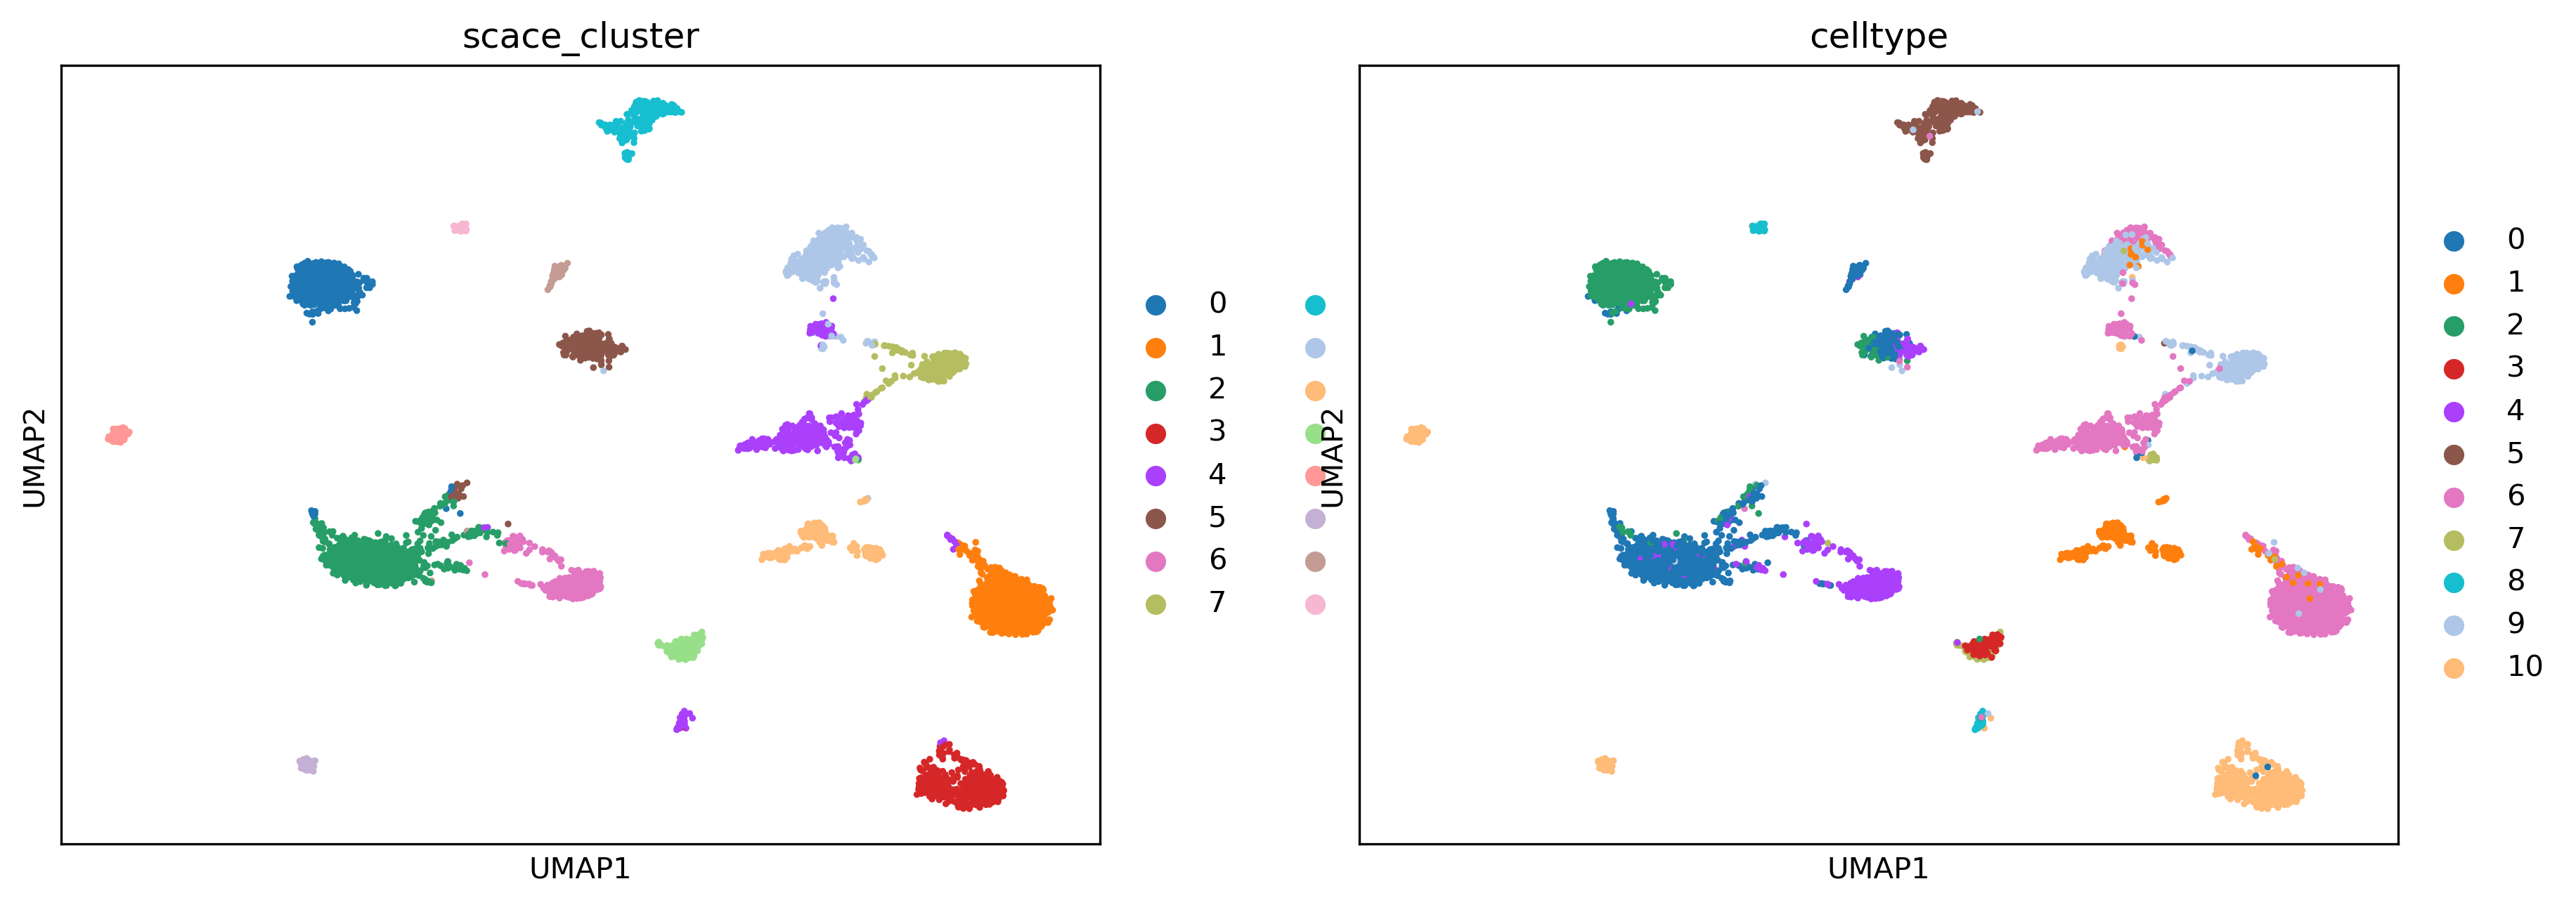

In [7]:
adata.obs['celltype'] = adata.obs['celltype'].astype(int).astype('category')
adata.obs['scace_cluster'] = adata.obs['scace_cluster'].astype(int).astype('category')
sc.pl.umap(adata, color=['scace_cluster', 'celltype'])

### Show initial clustering results

In [8]:
# emb_all[0] is the embedding after pre-training
# pred_all[0] is the initial clustering result after pre-training

adata_tmp = sc.AnnData(emb_all[0])
adata_tmp.obs['celltype'] = adata.obs['celltype']
adata_tmp.obs['scace_cluster'] = pred_all[0]
adata_tmp.obs['scace_cluster'] = adata_tmp.obs['scace_cluster'].astype(int).astype('category')

/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


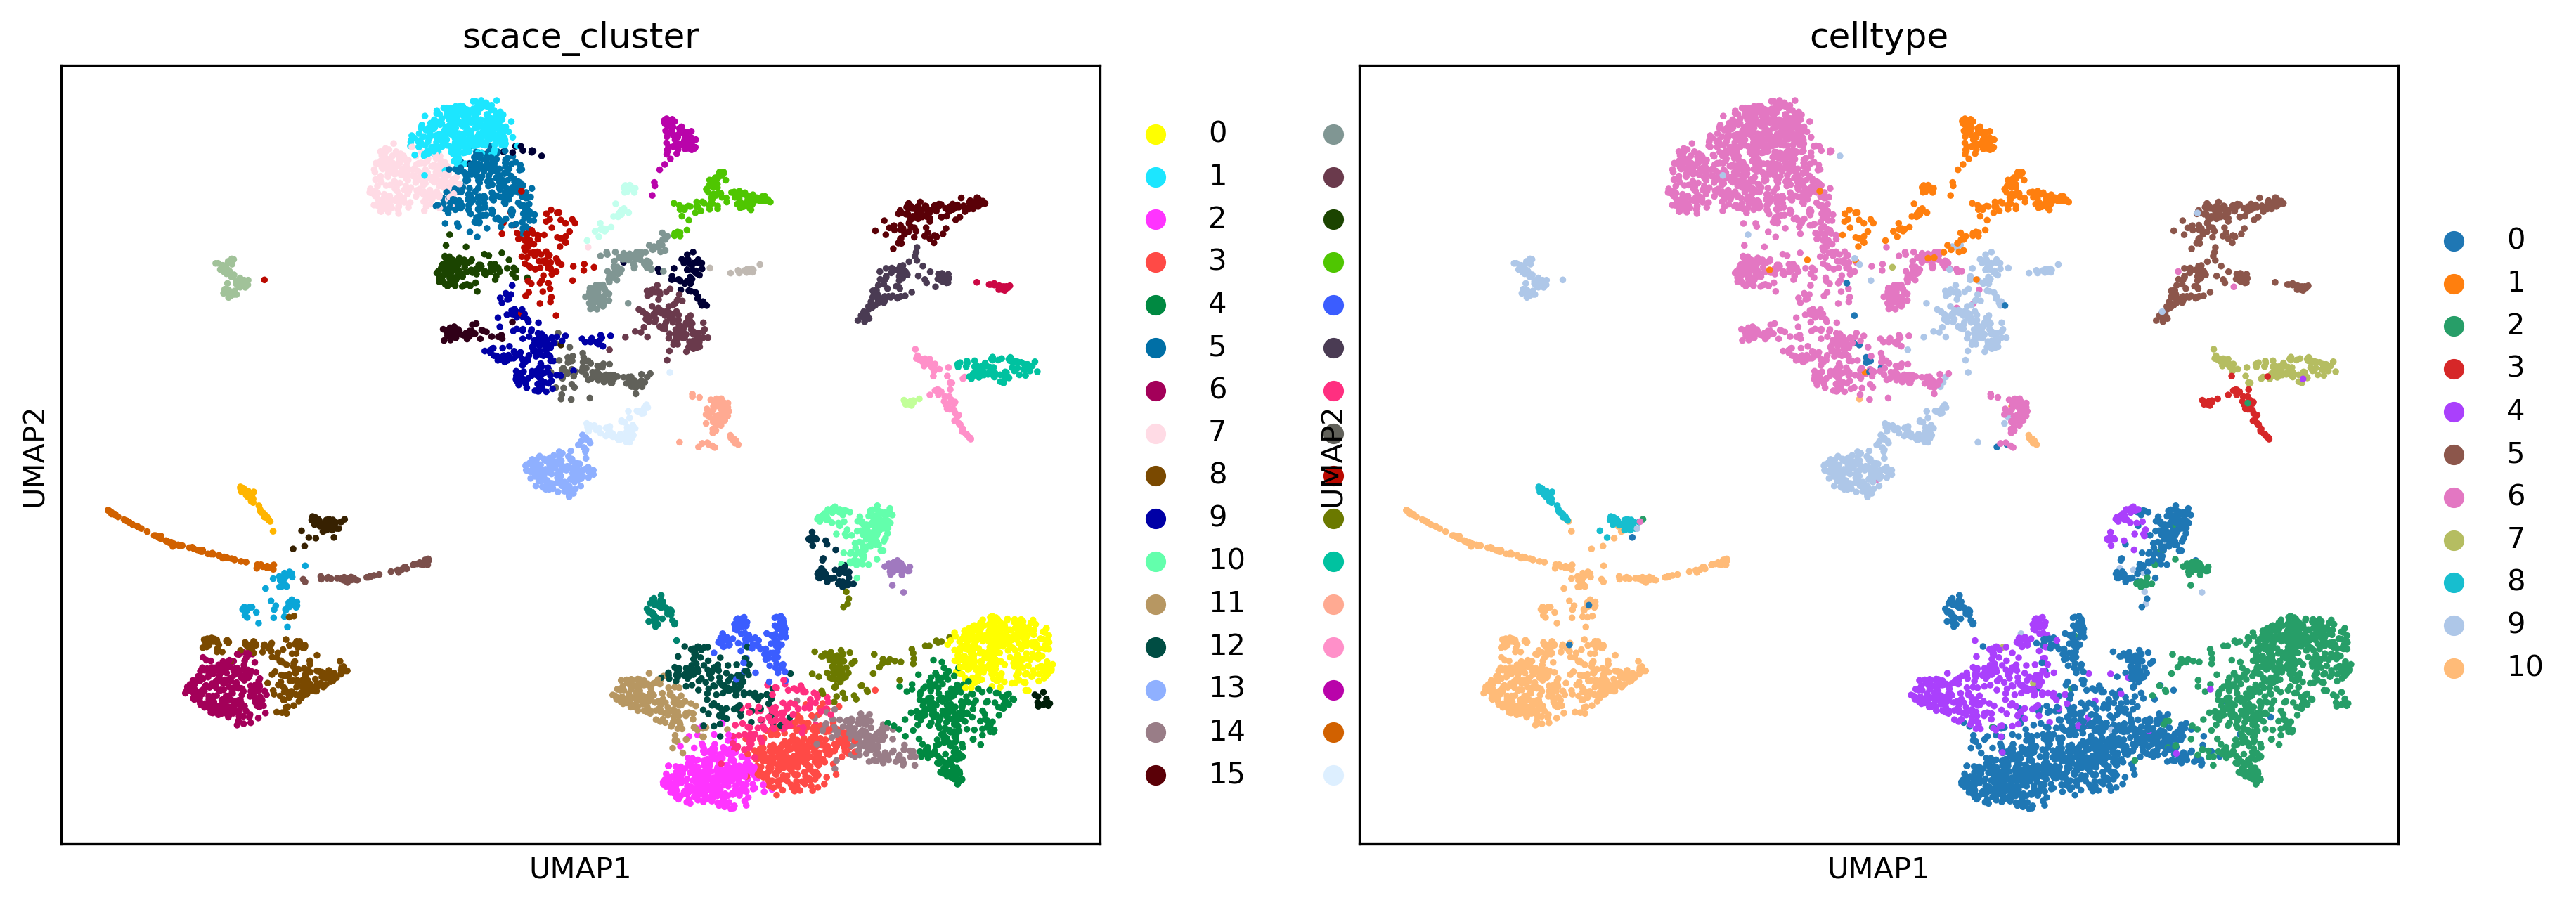

In [9]:
sc.pp.neighbors(adata_tmp)
sc.tl.umap(adata_tmp)
sc.pl.umap(adata_tmp, color=['scace_cluster', 'celltype'])

### Show clustering results before and after cluster merging

For the first time

In [10]:
# emb_all[1] is the embedding of the first cluster merging.
# pred_all[1] is the all clustering results from the first cluster merging, where
# pred_all[1][0] is the clustering result before cluster merging, and
# pred_all[1][0] is the clustering result after cluster merging.

adata_tmp = sc.AnnData(emb_all[1])
adata_tmp.obs['celltype'] = adata.obs['celltype']
adata_tmp.obs['scace_before'], adata_tmp.obs['scace_after'] = pred_all[1][0], pred_all[1][-1]
adata_tmp.obs['scace_before'] = adata_tmp.obs['scace_before'].astype(int).astype('category')
adata_tmp.obs['scace_after'] = adata_tmp.obs['scace_after'].astype(int).astype('category')

/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


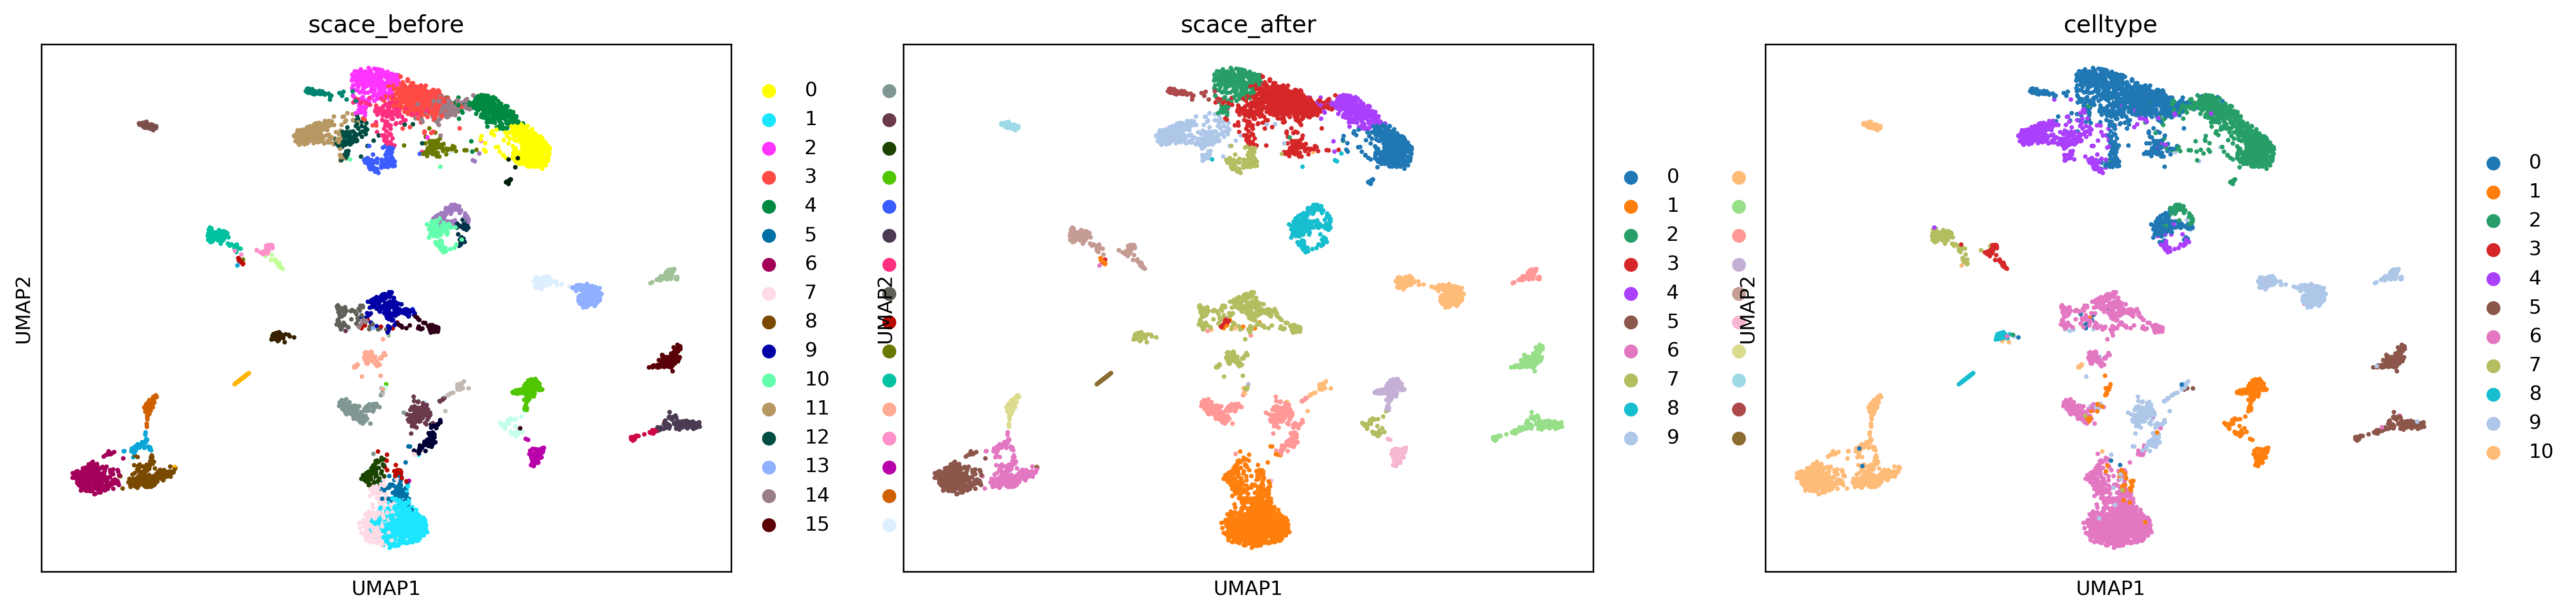

In [11]:
sc.pp.neighbors(adata_tmp)
sc.tl.umap(adata_tmp)
sc.pl.umap(adata_tmp, color=['scace_before', 'scace_after', 'celltype'])

For the final time

In [12]:
adata_tmp = sc.AnnData(emb_all[-2])
adata_tmp.obs['celltype'] = adata.obs['celltype']
adata_tmp.obs['scace_before'], adata_tmp.obs['scace_after'] = pred_all[2][0], pred_all[2][-1]
adata_tmp.obs['scace_before'] = adata_tmp.obs['scace_before'].astype(int).astype('category')
adata_tmp.obs['scace_after'] = adata_tmp.obs['scace_after'].astype(int).astype('category')

/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


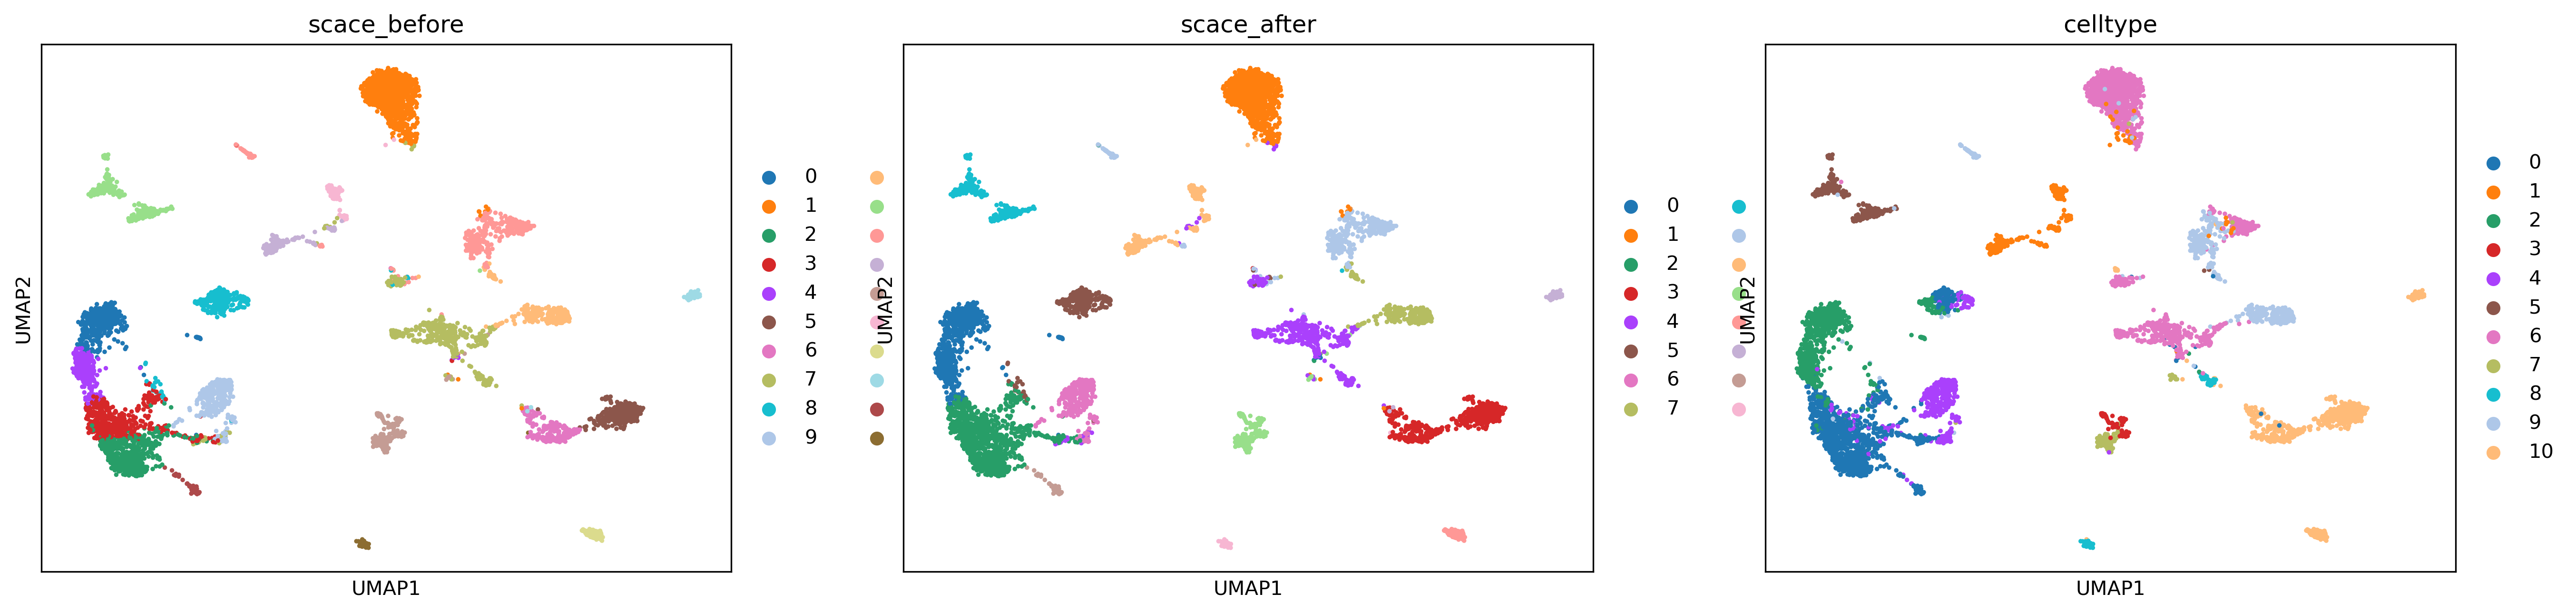

In [13]:
sc.pp.neighbors(adata_tmp)
sc.tl.umap(adata_tmp)
sc.pl.umap(adata_tmp, color=['scace_before', 'scace_after', 'celltype'])